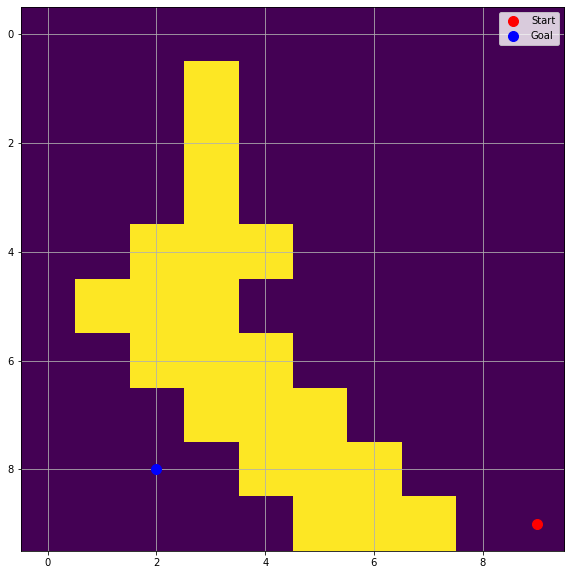

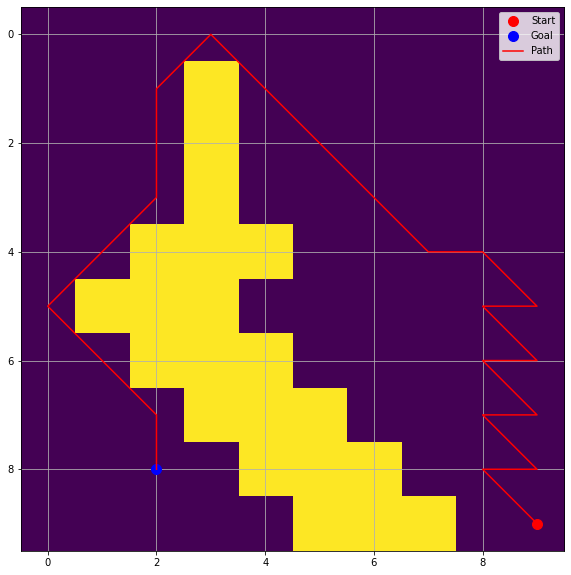

Path: [(9, 9), (8, 8), (8, 9), (7, 8), (7, 9), (6, 8), (6, 9), (5, 8), (5, 9), (4, 8), (4, 7), (3, 6), (2, 5), (1, 4), (0, 3), (1, 2), (2, 2), (3, 2), (4, 1), (5, 0), (6, 1), (7, 2), (8, 2)]
Path cost: 22


In [6]:
# A* search algorithm for shortest path using the g(n) and h(n) values from graph

import numpy as np
import matplotlib.pyplot as plt

# Grid class
class Grid:
    # Constructor
    def __init__(self, graph, start, goal):
        self.graph = graph
        self.start = start
        self.goal = goal
        self.path = []
        self.visited = []
        self.unvisited = []
        self.g = {}
        self.h = {}
        self.f = {}
        self.parent = {}
        self.cost = 0
        self.path_cost = 0
        self.visited.append(self.start)
        self.unvisited.append(self.start)
        self.g[self.start] = 0
        self.h[self.start] = self.heuristic(self.start)
        self.f[self.start] = self.g[self.start] + self.h[self.start]
        self.parent[self.start] = self.start

    # Heuristic function
    def heuristic(self, node):
        return np.sqrt((self.goal[0] - node[0])**2 + (self.goal[1] - node[1])**2)

    # A* search algorithm
    def a_star(self):
        while self.unvisited:
            # Find the node with the minimum f value
            min_f = self.f[self.unvisited[0]]
            min_node = self.unvisited[0]
            for node in self.unvisited:
                if self.f[node] < min_f:
                    min_f = self.f[node]
                    min_node = node
            # Remove the node from the unvisited list
            self.unvisited.remove(min_node)
            # Add the node to the visited list
            self.visited.append(min_node)
            # Check if the goal is reached
            if min_node == self.goal:
                # Calculate the path
                self.path.append(self.goal)
                self.path_cost = self.g[self.goal]
                while self.parent[self.path[-1]] != self.start:
                    self.path.append(self.parent[self.path[-1]])
                self.path.append(self.start)
                self.path.reverse()
                break
            # Find the neighbors of the current node
            neighbors = []
            for i in range(-1, 2):
                for j in range(-1, 2):
                    if i == 0 and j == 0:
                        continue
                    neighbor = (min_node[0] + i, min_node[1] + j)
                    if neighbor[0] < 0 or neighbor[0] >= self.graph.shape[0] or neighbor[1] < 0 or neighbor[1] >= self.graph.shape[1]:
                        continue
                    if self.graph[neighbor[0], neighbor[1]] == 1:       # Obstacle
                        continue
                    neighbors.append(neighbor)
            # Update the g, h, f, and parent values of the neighbors
            for neighbor in neighbors:
                if neighbor in self.visited:
                    continue
                if neighbor not in self.unvisited:
                    self.unvisited.append(neighbor)
                self.g[neighbor] = self.g[min_node] + 1
                self.h[neighbor] = self.heuristic(neighbor)
                self.f[neighbor] = self.g[neighbor] + self.h[neighbor]
                self.parent[neighbor] = min_node

    # Plot the graph
    def plot_graph(self):
        plt.figure(figsize=(10, 10))
        plt.imshow(self.graph)
        plt.plot(self.start[1], self.start[0], 'ro', label='Start', markersize=10)
        plt.plot(self.goal[1], self.goal[0], 'bo', label='Goal', markersize=10)
        plt.grid()
        plt.legend()
        plt.show()

    # Plot the path
    def plot_path(self):
        plt.figure(figsize=(10, 10))
        plt.imshow(self.graph)
        plt.plot(self.start[1], self.start[0], 'ro', label='Start', markersize=10)
        plt.plot(self.goal[1], self.goal[0], 'bo', label='Goal', markersize=10)
        plt.plot([node[1] for node in self.path], [node[0] for node in self.path], 'r', label='Path')
        plt.grid()
        plt.legend()
        plt.show()

# Main function
def main():
    # Create the graph
    graph = np.zeros((10, 10))
    graph[1:4, 3] = 1
    graph[4, 2:5] = 1
    graph[5, 1:4] = 1
    graph[6, 2:5] = 1
    graph[7, 3:6] = 1
    graph[8, 4:7] = 1
    graph[9, 5:8] = 1
    # Create the graph object
    graph_obj = Grid(graph, (9, 9), (8, 2))
    # Plot the graph
    graph_obj.plot_graph()
    # Find the shortest path
    graph_obj.a_star()
    # Plot the path
    graph_obj.plot_path()
    # Print the path
    print('Path:', graph_obj.path)
    print('Path cost:', graph_obj.path_cost)

main()